In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x if isinstance(x, list) else None)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

## Customizing our chart from`12_Exersize_Trending_Skills.ipynb`

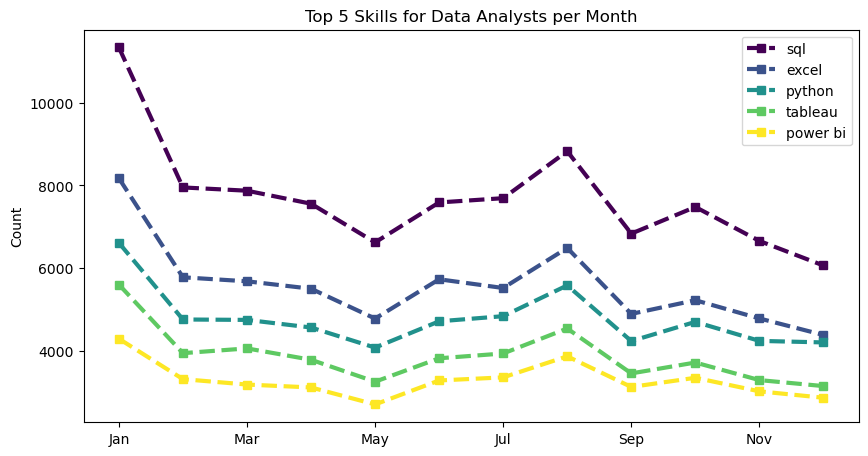

In [2]:
#create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#explode the job_skills column and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

#sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

#Get the top 5 skills and design plot
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=3,
    linestyle='--',
    colormap='viridis',
    marker='s',
    markersize=6,
    figsize=(10, 5.1)
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.legend(title=None)
plt.show()

## Customizing Scatter Plot `15_Scatter_Plot.ipynb`

In [3]:
df = df[df['job_title_short'] == 'Data Analyst']

# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

# Limit to the top skills
skill_count = 20
skills_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

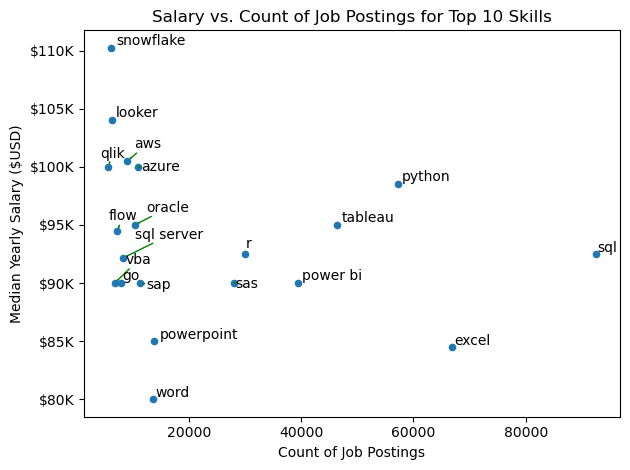

In [4]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, skill in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], skill))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

#Set axis labels, title, and legend
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()